In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imaging
import tools
import prior_box as pb
from data_augmenter import DataAugmenter
from generator import Generator
from bbox_codec import BBoxCodec

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
img_dir = '../datasets/voc2012/VOCtrainval_11-May-2012/JPEGImages/'
test_img_file = '2007_000032.jpg'

# Load prepared GroundTruth boxes
gtb = pickle.load(open('data/pascal_voc_2012.p', 'rb'))
test_y = gtb[test_img_file].copy()

target_img_w, target_img_h = 300, 300

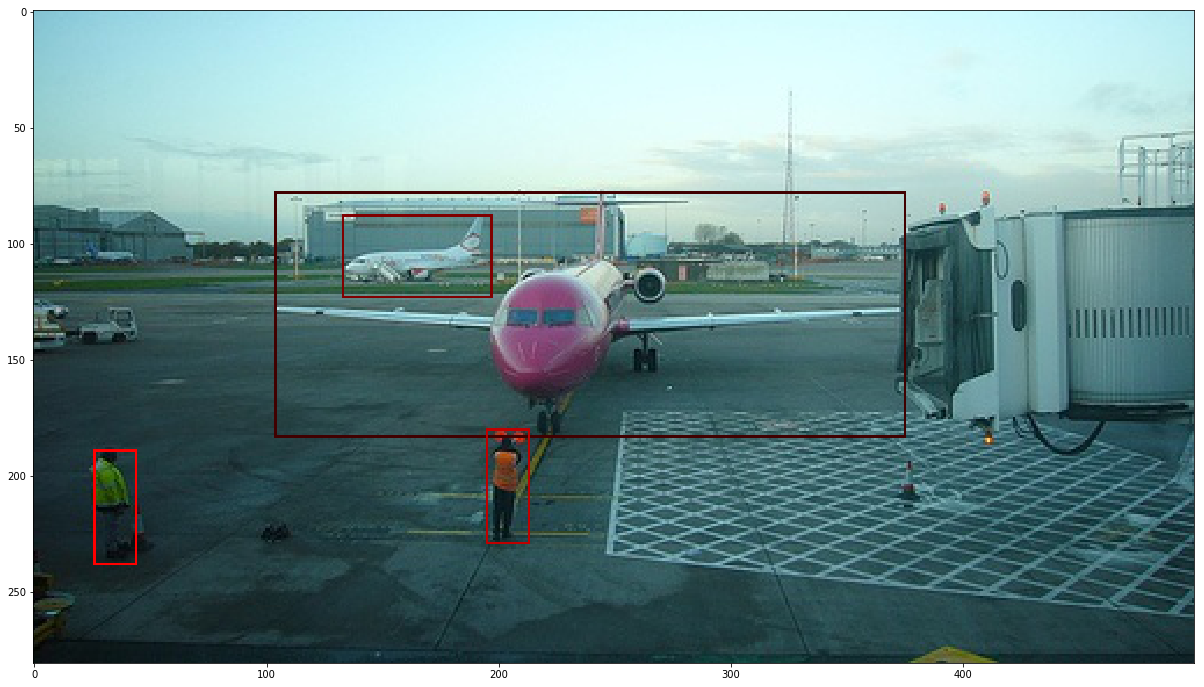

In [3]:
# Load test image and show it with boxes
test_img = imaging.load_img(img_dir + test_img_file)
test_img_float = test_img.astype(np.float32)
tools.draw_boxes(test_img, test_y, log=False)

## Test DataAugmenter

In [4]:
# Augment data
augmenter = DataAugmenter(target_image_size=(target_img_w, target_img_h))
augmented_img, augmented_y = augmenter.augment(test_img_float, test_y)

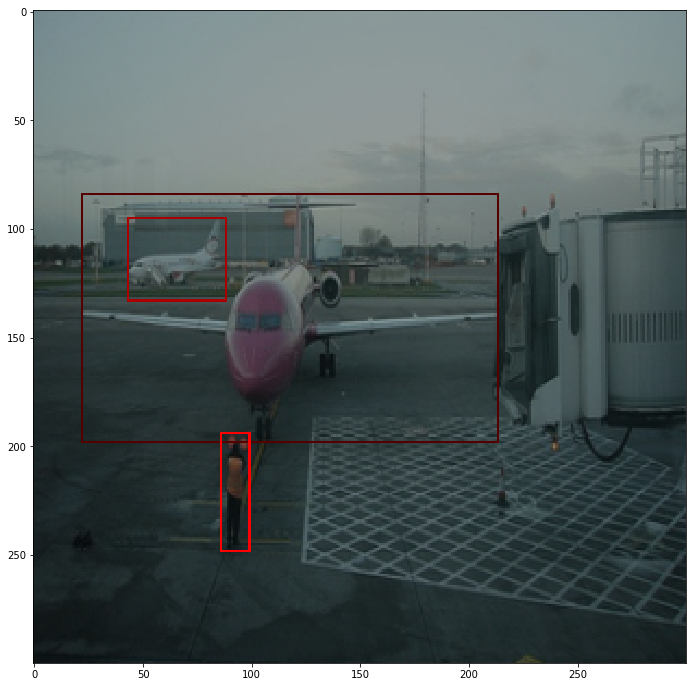

In [5]:
tools.draw_boxes(augmented_img.astype(np.uint8), augmented_y, log=False)

## Test Generator

In [6]:
# Test Generator
num_classes = 20
img_file_names = list(gtb.keys())#[:4]
#print(img_file_names)

prior_boxes = pb.create_prior_boxes_vect(target_img_w, target_img_h, pb.default_config, pb.default_prior_variance)
bbox_codec = BBoxCodec(prior_boxes, num_classes)
gen = Generator(gtb, img_dir, augmenter, bbox_codec)
# get first batch
x_batch, y_batch = next(gen.flow(img_file_names, batch_size=4))

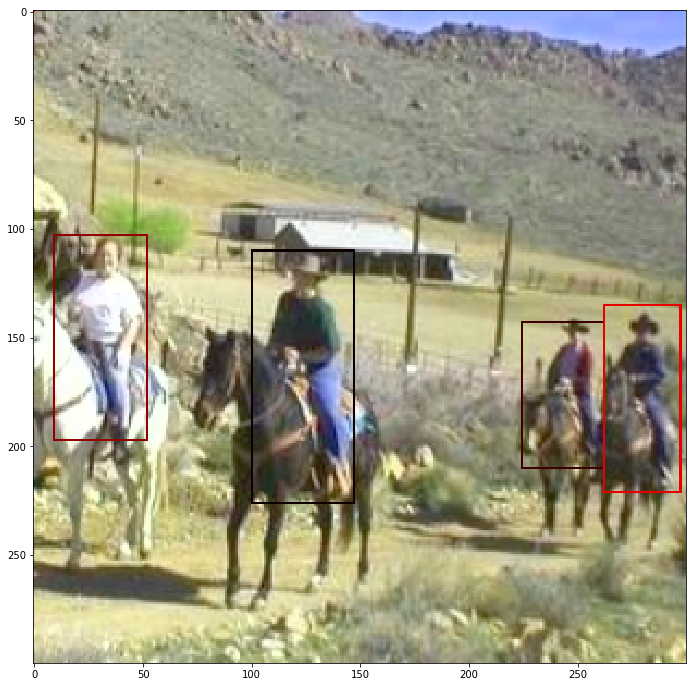

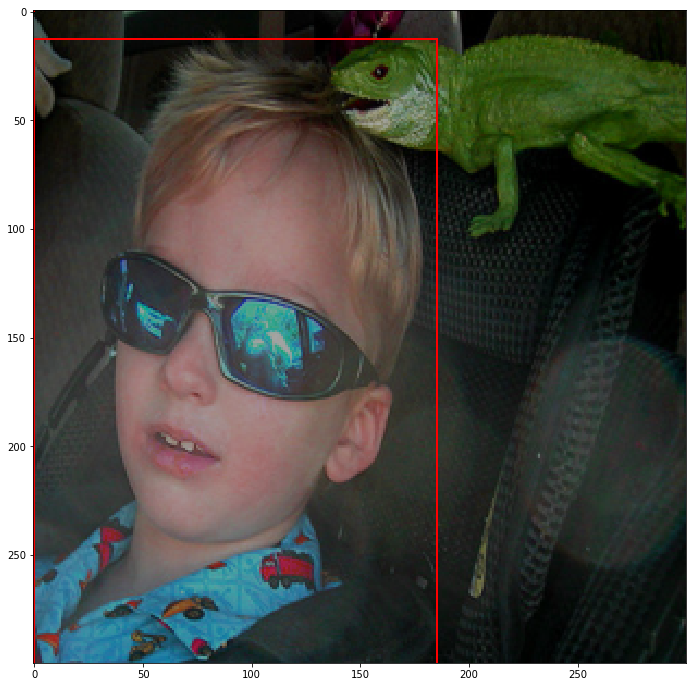

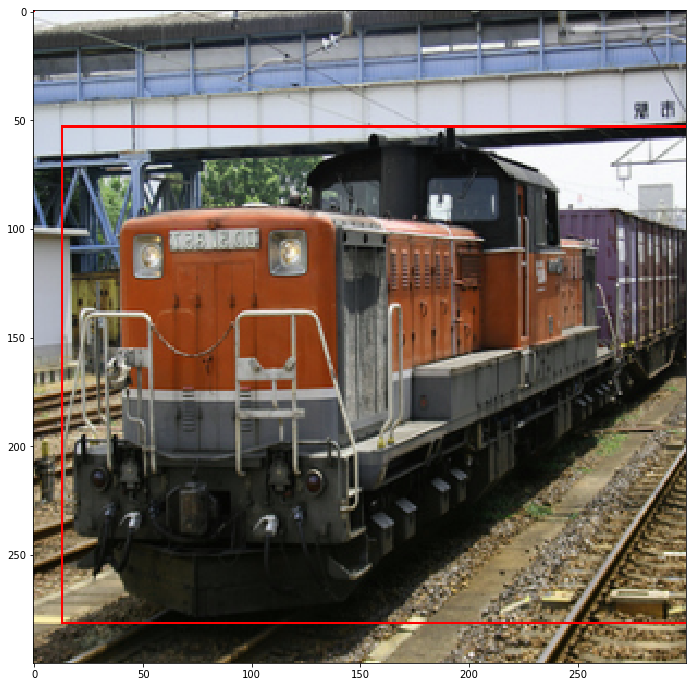

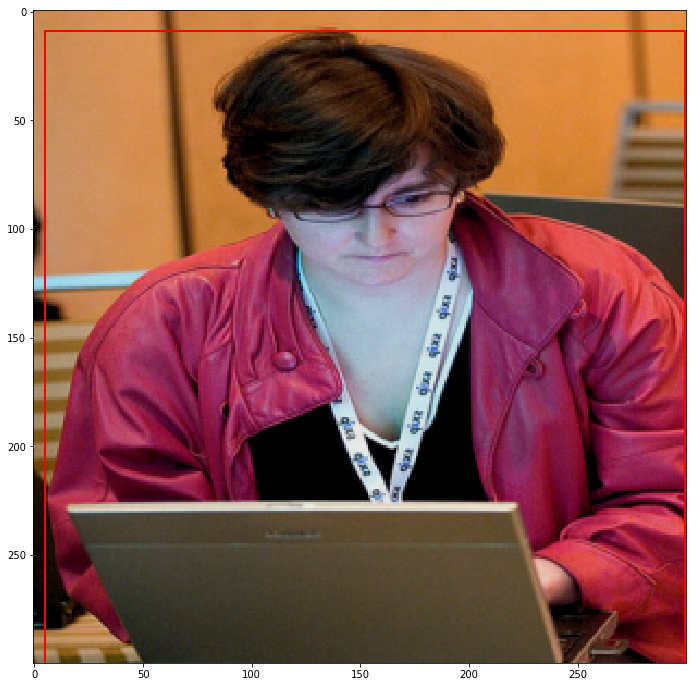

In [7]:
for img, y in zip(x_batch, y_batch):
    # denormalize
    img = 127.5*(img + 1.0)
    tools.draw_boxes(img.astype(np.uint8), y, log=False)
